In [40]:
import numpy as np
import pandas as pd
import scipy.io
import os
from scipy.signal import savgol_filter
from dtaidistance import dtw
import seaborn as sns
from sklearn import preprocessing
from numpy import inf
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [29]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\..\\'

In [30]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [31]:
Ratings = pd.read_excel(load_path + 'Ratings.xlsx')

In [32]:
presentations_ids = Features['presentation_id'].values
presentations_ids.shape

(603,)

In [33]:
indices_dict = []
series = []

for i, presentation_id in enumerate(presentations_ids):
    print(presentation_id, end='\r')
    
    indices_dict.append(presentation_id)
    
    clip_id = presentation_id % 100
    user_id = int(presentation_id / 100)
    
    #data_path = './../../ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    
    if os.path.isfile(data_path):
        
        signal = scipy.io.loadmat(data_path)
        resistance = signal['Data_GSR'][:,4]
        
        resistance = savgol_filter(resistance, 501, 3)
        series.append(resistance)  

In [34]:
dist_matrix = np.load('dist_matrix.npy')

In [35]:
dist_matrix

array([[             inf,  685999.80847838,    6072.28759009, ...,
        3783948.6750768 , 4228522.04475941, 4413644.28624652],
       [             inf,              inf,  680700.33258028, ...,
        2984104.29115066, 3320866.42893749, 3443009.31890644],
       [             inf,              inf,              inf, ...,
        3278822.99052139, 4222344.78294347, 3741613.45647243],
       ...,
       [             inf,              inf,              inf, ...,
                     inf,  705816.71935999,  976350.51213576],
       [             inf,              inf,              inf, ...,
                     inf,              inf,  104844.25074745],
       [             inf,              inf,              inf, ...,
                     inf,              inf,              inf]])

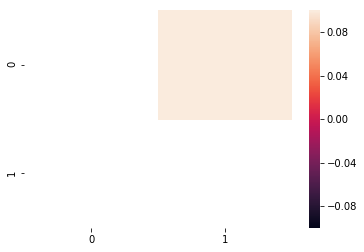

In [36]:
sns.heatmap(dist_matrix[:2,:2])

In [37]:
#dist_matrix[dist_matrix == inf] = 0.0

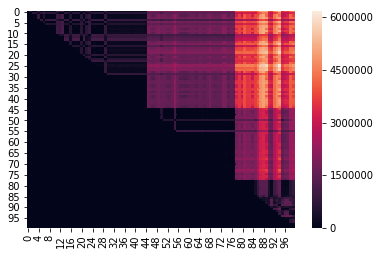

In [38]:
#sns.heatmap(dist_matrix)

In [39]:
#dist_matrix

array([[      0.        ,  685999.80847838,    6072.28759009, ...,
        3783948.6750768 , 4228522.04475941, 4413644.28624652],
       [      0.        ,       0.        ,  680700.33258028, ...,
        2984104.29115066, 3320866.42893749, 3443009.31890644],
       [      0.        ,       0.        ,       0.        , ...,
        3278822.99052139, 4222344.78294347, 3741613.45647243],
       ...,
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,  705816.71935999,  976350.51213576],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,  104844.25074745],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ]])

In [41]:
Z = linkage(dist_matrix, method='ward')

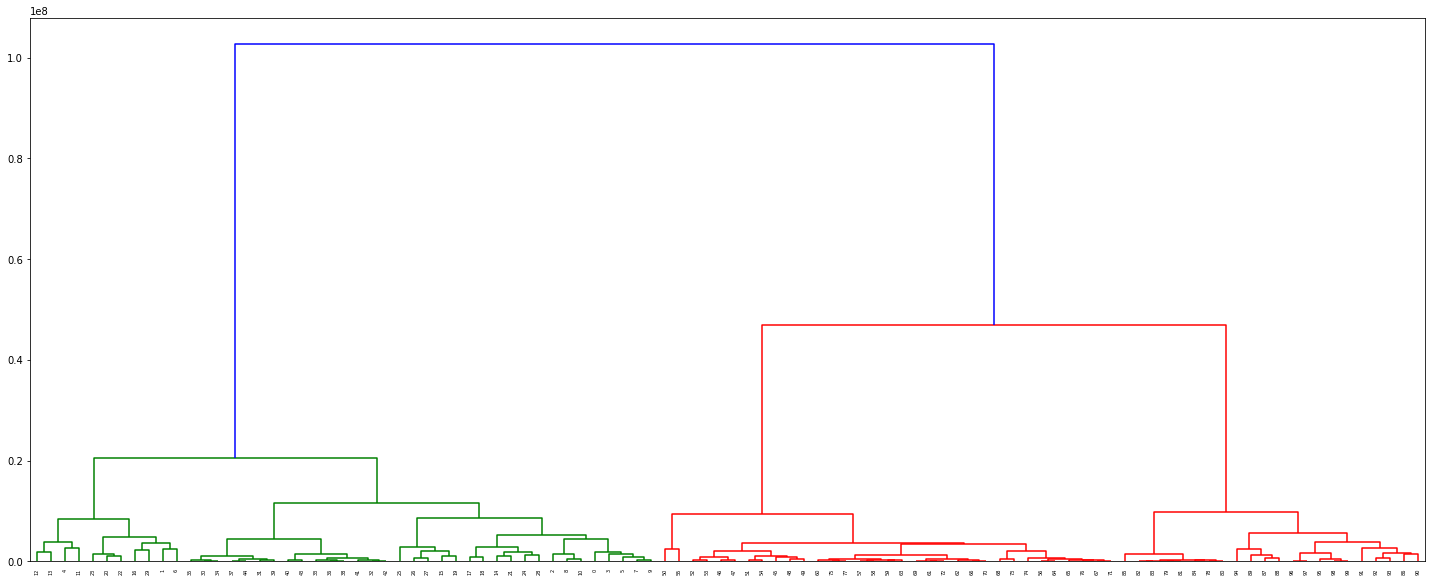

In [57]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.savefig('dendrogram_no_penalty.png', format='png', dpi=1000)
plt.show()

In [51]:
Z[1,0]

82.0

In [52]:
Z[1,1]

83.0

In [53]:
Z

array([[9.60000000e+01, 9.70000000e+01, 3.15389029e+04, 2.00000000e+00],
       [8.20000000e+01, 8.30000000e+01, 5.43860038e+04, 2.00000000e+00],
       [7.50000000e+01, 7.70000000e+01, 6.19367872e+04, 2.00000000e+00],
       [7.80000000e+01, 8.00000000e+01, 7.47198368e+04, 2.00000000e+00],
       [7.90000000e+01, 8.10000000e+01, 7.72441445e+04, 2.00000000e+00],
       [6.10000000e+01, 7.20000000e+01, 8.70611413e+04, 2.00000000e+00],
       [5.70000000e+01, 5.80000000e+01, 8.76830831e+04, 2.00000000e+00],
       [3.00000000e+01, 3.40000000e+01, 8.89047078e+04, 2.00000000e+00],
       [3.60000000e+01, 3.80000000e+01, 1.00586360e+05, 2.00000000e+00],
       [6.90000000e+01, 1.05000000e+02, 1.03733733e+05, 3.00000000e+00],
       [9.80000000e+01, 9.90000000e+01, 1.04844251e+05, 2.00000000e+00],
       [6.70000000e+01, 7.10000000e+01, 1.08479907e+05, 2.00000000e+00],
       [3.20000000e+01, 4.20000000e+01, 1.19275750e+05, 2.00000000e+00],
       [1.01000000e+02, 1.04000000e+02, 1.21932303e